In [1]:

import sys
# !conda install --yes --prefix {sys.prefix} pandas==1.2.1
!{sys.executable} -m pip install pandas==1.2.1
!{sys.executable} -m pip install tqdm>=4.6.3



You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [28]:
#imports
import pandas as pd
import numpy as np
import nltk
import re
import os
from tqdm import tqdm, tqdm_pandas
#tqdm_pandas(tqdm())
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt 
import matplotlib as mpl

def setup_mpl():
    mpl.rcParams['font.family'] = 'Times New Roman'
    return
setup_mpl()

# Text preprocessing

In [29]:
# Preprocessing function

porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

# Keep numbers / Remove numbers / Substitute numbers with token
# Keep URL / Remove URL / Substitute URL with token

def preprocess(text):
    #Common english stop words
    stop_words = set(stopwords.words('english'))
    # Substituting urls with 
    url_regex = r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
    text = re.sub(r'http\S+', '#URL#', str(text)) # Maybe change to single-character-symbol -> shingles
    #Tokenize using nltk
    word_tokens = word_tokenize(text.lower())
    #removing none letter characters and stop words
    filtered_sentence = [w for w in word_tokens if w not in stop_words and w.isalpha()]
    #Conduct stemming
    processed_text = [porter.stem(t) for t in filtered_sentence]
    return processed_text

### SMS spam: 

In [30]:
PATH = "../data/regular/spam.csv"
SMS = pd.read_csv(PATH)[['v1','v2']]
SMS = SMS.rename(columns={'v1': 'label', 'v2': 'text'})

label = SMS['label'].values
text = SMS['text'].values

In [41]:
SMS['tokens'] = [preprocess(x) for x in tqdm(SMS['text'])]
SMS['str_tokens'] = [' '.join(x) for x in tqdm(SMS['tokens'])]
# Removing rows of emtpty tokens
SMS = SMS[SMS['tokens'].astype(bool)]
binary_dict = {'ham': 0, 'spam': 1}
SMS['binary'] = [binary_dict[x] for x in tqdm(SMS['label'])]
SMS.to_csv('../data/clean/clean_spam.csv', index=False)


100%|██████████| 5551/5551 [00:00<00:00, 1972598.62it/s]


### Email spam

In [32]:
PATH = "../data/regular/completeSpamAssassin.csv"
EMAIL = pd.read_csv(PATH, index_col = 'Unnamed: 0')

EMAIL.rename(columns = {'Label':'label', 'Body':'text'}, inplace = True)

EMAIL['label'] = EMAIL['label'].replace(0, 'ham')
EMAIL['label'] = EMAIL['label'].replace(1, 'spam')

# Removing 'empty' rows
EMAIL.text = np.where(EMAIL.text.isin(['empty']), np.nan, EMAIL.text)
EMAIL = EMAIL.dropna().reset_index().drop(columns=['index'])

In [44]:
EMAIL['tokens'] = [preprocess(x) for x in tqdm(EMAIL['text'])]
EMAIL['str_tokens'] = [' '.join(x) for x in tqdm(EMAIL['tokens'])]
EMAIL = EMAIL[EMAIL['tokens'].astype(bool)]
binary_dict = {'ham': 0, 'spam': 1}
EMAIL['binary'] = [binary_dict[x] for x in tqdm(EMAIL['label'])]
EMAIL.to_csv('../data/clean/clean_completeSpamAssassin.csv', index=False)

100%|██████████| 5507/5507 [00:00<00:00, 1966292.00it/s]


In [43]:
EMAIL

,text,label,tokens,str_tokens
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,spam,"[save, life, insur, spend, life, quot, save, e...",save life insur spend life quot save ensur fam...
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,spam,"[fight, risk, cancer, url, slim, guarante, los...",fight risk cancer url slim guarante lose lb da...
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,spam,"[fight, risk, cancer, url, slim, guarante, los...",fight risk cancer url slim guarante lose lb da...
3,##############################################...,spam,"[adult, club, offer, free, membership, instant...",adult club offer free membership instant acces...
4,I thought you might like these:\n1) Slim Down ...,spam,"[thought, might, like, slim, guarante, lose, l...",thought might like slim guarante lose lb day u...
...,...,...,...,...
5507,----------------------------------------------...,ham,"[isilo, tm, palm, os, pocket, pc, window, ente...",isilo tm palm os pocket pc window enter isilo ...
5508,"EFFector Vol. 15, No. 35 November ...",ham,"[effector, vol, novemb, ren, public, electron,...",effector vol novemb ren public electron fronti...
5509,\nWe have extended our Free seat sale until Th...,ham,"[extend, free, seat, sale, thursday, novemb, d...",extend free seat sale thursday novemb detail s...
5510,___ ___ ...,ham,"[insignific, matter, heavili, overemphasis, hu...",insignific matter heavili overemphasis hugh mt...


## Job postings

In [35]:
PATH = "../data/regular/Job_postings.csv"
JOB = pd.read_csv(PATH, usecols=['company_profile', 'description', 'fraudulent'])

JOB["text"] = JOB["company_profile"] + " " + JOB["description"]

JOB.rename(columns = {'fraudulent':'label'}, inplace = True)

JOB['label'] = JOB['label'].replace(0, 'fraudulent')
JOB['label'] = JOB['label'].replace(1, 'genuine')

JOB = JOB.drop(columns=['company_profile', 'description'])
JOB = JOB.dropna()

JOB
# Removing 'empty' rows
#EMAIL.Body = np.where(EMAIL.Body.isin(['empty']), np.nan, EMAIL.Body)
#EMAIL = EMAIL.dropna().reset_index().drop(columns=['index'])

,label,text
0,fraudulent,"We're Food52, and we've created a groundbreaki..."
1,fraudulent,"90 Seconds, the worlds Cloud Video Production ..."
2,fraudulent,Valor Services provides Workforce Solutions th...
3,fraudulent,Our passion for improving quality of life thro...
4,fraudulent,SpotSource Solutions LLC is a Global Human Cap...
...,...,...
17872,fraudulent,Flite delivers ad innovation at scale to the w...
17875,fraudulent,Vend is looking for some awesome new talent to...
17876,fraudulent,WebLinc is the e-commerce platform and service...
17877,fraudulent,We Provide Full Time Permanent Positions for m...


In [45]:
JOB['tokens'] = [preprocess(x) for x in tqdm(JOB['text'])]
JOB['str_tokens'] = [' '.join(x) for x in tqdm(JOB['tokens'])]
JOB = JOB[JOB['tokens'].astype(bool)]
binary_dict = {'genuine': 0, 'fraudulent': 1}
JOB['binary'] = [binary_dict[x] for x in tqdm(JOB['label'])]
JOB.to_csv('../data/clean/clean_Job_postings.csv', index=False)

100%|██████████| 14572/14572 [00:00<00:00, 2077266.01it/s]


In [46]:
JOB

,label,text,tokens,str_tokens,binary
0,fraudulent,"We're Food52, and we've created a groundbreaki...","[creat, groundbreak, cook, site, support, conn...",creat groundbreak cook site support connect ce...,1
1,fraudulent,"90 Seconds, the worlds Cloud Video Production ...","[second, world, cloud, video, product, second,...",second world cloud video product second world ...,1
2,fraudulent,Valor Services provides Workforce Solutions th...,"[valor, servic, provid, workforc, solut, meet,...",valor servic provid workforc solut meet need c...,1
3,fraudulent,Our passion for improving quality of life thro...,"[passion, improv, qualiti, life, geographi, he...",passion improv qualiti life geographi heart ev...,1
4,fraudulent,SpotSource Solutions LLC is a Global Human Cap...,"[spotsourc, solut, llc, global, human, capit, ...",spotsourc solut llc global human capit manag c...,1
...,...,...,...,...,...
17872,fraudulent,Flite delivers ad innovation at scale to the w...,"[flite, deliv, ad, innov, scale, world, top, p...",flite deliv ad innov scale world top publish b...,1
17875,fraudulent,Vend is looking for some awesome new talent to...,"[vend, look, awesom, new, talent, come, join, ...",vend look awesom new talent come join us work ...,1
17876,fraudulent,WebLinc is the e-commerce platform and service...,"[weblinc, platform, servic, provid, fastest, g...",weblinc platform servic provid fastest grow on...,1
17877,fraudulent,We Provide Full Time Permanent Positions for m...,"[provid, full, time, perman, posit, mani, medi...",provid full time perman posit mani medium larg...,1


## NEWS

In [47]:
PATH = "../data/regular/NEWS.csv"
NEWS = pd.read_csv(PATH, usecols=['text', 'label'])

NEWS['tokens'] = [preprocess(x) for x in tqdm(NEWS['text'])]
NEWS['str_tokens'] = [' '.join(x) for x in tqdm(NEWS['tokens'])]
NEWS = NEWS[NEWS['tokens'].astype(bool)]
binary_dict = {'real': 0, 'fake': 1}
NEWS['binary'] = [binary_dict[x] for x in tqdm(NEWS['label'])]
NEWS.to_csv('../data/clean/clean_News.csv', index=False)

100%|██████████| 44266/44266 [00:00<00:00, 1834943.23it/s]


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data analysis

The following analysis will investigate the nature of the spam/ham dataset. More specifically, we will look into how long the typical SMS is for each group respectively. Subsequently, we will investigate the amount of spelling mistakes present in each group.

In [14]:
from ast import literal_eval
df = pd.read_csv('../data/clean/clean_spam.csv', encoding= "ISO-8859-1")
df.tokens = df.tokens.apply(literal_eval)
df.head()

,label,text,tokens,str_tokens
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, avail, bugi, n, great, wor...",go jurong point avail bugi n great world la e ...
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, wkli, comp, win, fa, cup, final,...",free entri wkli comp win fa cup final tkt may ...
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goe, usf, live, around, though]",nah think goe usf live around though


In [15]:
df['len'] = df.tokens.str.len()
df_spam = df[df.label=='spam']
df_ham = df[df.label=='ham']

First let us investigate the proportion of ham and spam in the dataset:

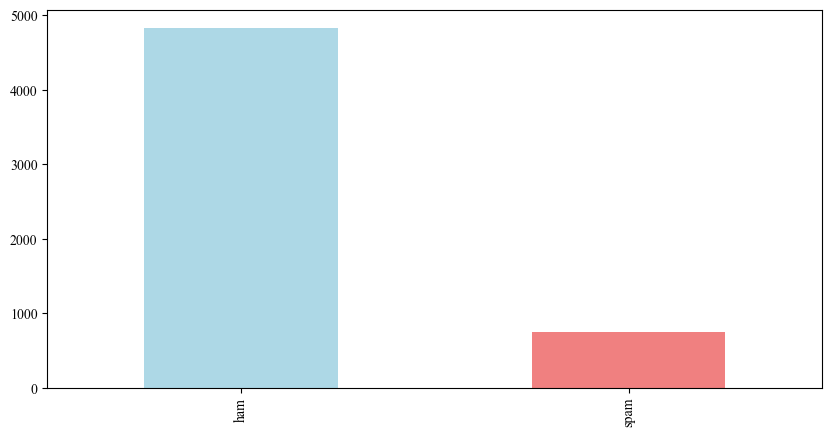

In [16]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
df.label.value_counts().plot(kind='bar', ax=ax, color=['lightblue', 'lightcoral'])
plt.show()

Notably, the dataset illustrated a significant class imbalance, which would probably have to be taken into account when training models for classification.
The following will analyse the length distribution of spam and ham mails:

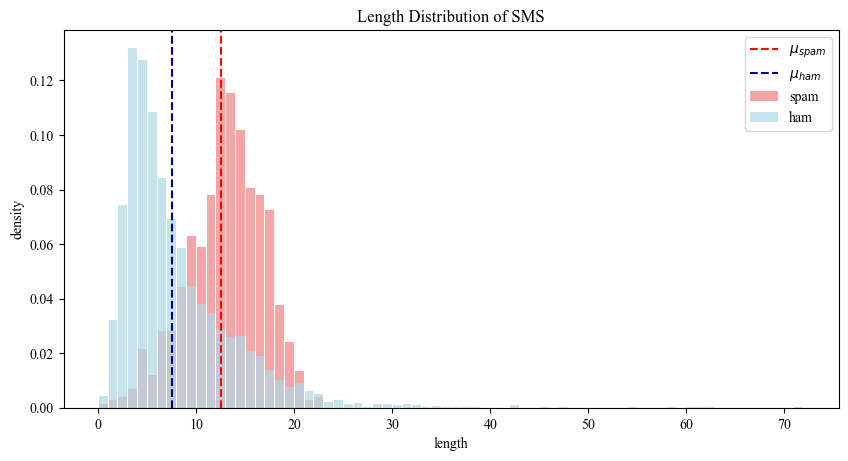

In [17]:

spam_len = list(df_spam.len.values)
ham_len = list(df_ham.len.values)

bins = np.arange(min(spam_len), max(spam_len), 1)
hist, edges = np.histogram(spam_len, bins=bins, density=True)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]

fig, ax = plt.subplots(1, figsize=(10,5), dpi=100)
ax.bar(x, hist, width=width*0.91, color='lightcoral', label='spam', alpha=0.7)
ax.set_ylabel("counts")
ax.set_xlabel("k")
ax.set_title("")

ax.axvline(np.mean(spam_len), c='red', label='$\mu_{spam}$', linestyle='dashed')
ax.axvline(np.mean(ham_len), c='darkblue', label='$\mu_{ham}$', linestyle='dashed')

bins = np.arange(min(ham_len), max(ham_len), 1)
hist, edges = np.histogram(ham_len, bins=bins, density=True)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]
ax.bar(x, hist, width=width*0.90, color='lightblue', label='ham', alpha=0.7)

ax.legend()
ax.set_ylabel("density")
ax.set_xlabel("length")
ax.set_title("Length Distribution of SMS") #TODO: maybe change to number of words

plt.show()

By visually inspecting the above figure, it appears that spam SMSes tend to have longer content than ham SMSes.

In [18]:
print(f'Mean of spam: {np.mean(spam_len)}')
print(f'Standard deviation of spam: {np.std(spam_len)}')
print()
print(f'Mean of ham: {np.mean(ham_len)}')
print(f'Standard deviation of ham: {np.std(ham_len)}')

Mean of spam: 12.556894243641231
Standard deviation of spam: 3.8856361985562224

Mean of ham: 7.529740932642487
Standard deviation of ham: 6.011663657664499


Furthermore, the following will investigate the proportion of spelling mistakes in each group respectively.

In [19]:
from spellchecker import SpellChecker
import re
import nltk
from tqdm import tqdm

tqdm.pandas()

def find_misspelled(row):
    #TODO: add words that are not misspelled but not in dictionary e.g. nokia
    text = row.text.lower()
    spell = SpellChecker()
    words = nltk.tokenize.word_tokenize(text)
    #re_pattern = '[a-z]+'
    #re_pattern = '[a-z]{2,}'
    #words = re.findall(re_pattern, text)
    misspelled = [word for word in spell.unknown(words) if str(word) not in ['nan']]
    return misspelled

In [20]:
df['misspelled'] = df.progress_apply(lambda row: find_misspelled(row), axis=1)

100%|██████████| 5572/5572 [05:03<00:00, 18.33it/s]


In [21]:
df['misspelled_size'] = df['misspelled'].apply(lambda x: len(x))

In [22]:
df_spam = df[df.label=='spam']
df_ham = df[df.label=='ham']

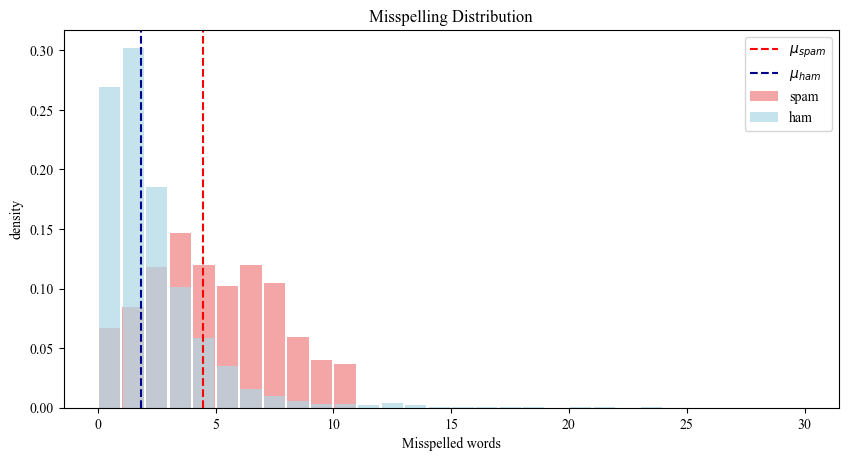

In [23]:
spam_len = list(df_spam.misspelled_size.values)
ham_len = list(df_ham.misspelled_size.values)

bins = np.arange(min(spam_len), max(spam_len), 1)
hist, edges = np.histogram(spam_len, bins=bins, density=True)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]

fig, ax = plt.subplots(1, figsize=(10,5), dpi=100)
ax.bar(x, hist, width=width*0.91, color='lightcoral', label='spam', alpha=0.7)
ax.set_ylabel("counts")
ax.set_xlabel("k")
ax.set_title("")

ax.axvline(np.mean(spam_len), c='red', label='$\mu_{spam}$', linestyle='dashed')
ax.axvline(np.mean(ham_len), c='darkblue', label='$\mu_{ham}$', linestyle='dashed')

bins = np.arange(min(ham_len), max(ham_len), 1)
hist, edges = np.histogram(ham_len, bins=bins, density=True)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]
ax.bar(x, hist, width=width*0.90, color='lightblue', label='ham', alpha=0.7)

ax.legend()
ax.set_ylabel("density")
ax.set_xlabel("Misspelled words")
ax.set_title("Misspelling Distribution")

plt.show()

In [24]:
print(f'Mean of spam: {np.mean(spam_len)}')
print(f'Standard deviation of spam: {np.std(spam_len)}')
print()
print(f'Mean of ham: {np.mean(ham_len)}')
print(f'Standard deviation of ham: {np.std(ham_len)}')

Mean of spam: 4.459170013386881
Standard deviation of spam: 2.7388583315655346

Mean of ham: 1.8147150259067357
Standard deviation of ham: 2.2210651990141197


# Email spam

In [25]:
df = pd.read_csv('../data/clean/clean_completeSpamAssassin.csv', encoding= "ISO-8859-1")
df.tokens = df.tokens.apply(literal_eval)
df.head()

,text,label,tokens,str_tokens
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,spam,"[save, life, insur, spend, life, quot, save, e...",save life insur spend life quot save ensur fam...
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,spam,"[fight, risk, cancer, url, slim, guarante, los...",fight risk cancer url slim guarante lose lb da...
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,spam,"[fight, risk, cancer, url, slim, guarante, los...",fight risk cancer url slim guarante lose lb da...
3,##############################################...,spam,"[adult, club, offer, free, membership, instant...",adult club offer free membership instant acces...
4,I thought you might like these:\n1) Slim Down ...,spam,"[thought, might, like, slim, guarante, lose, l...",thought might like slim guarante lose lb day u...


In [26]:
df['len'] = df.tokens.str.len()
df_spam = df[df.label=='spam']
df_ham = df[df.label=='ham']

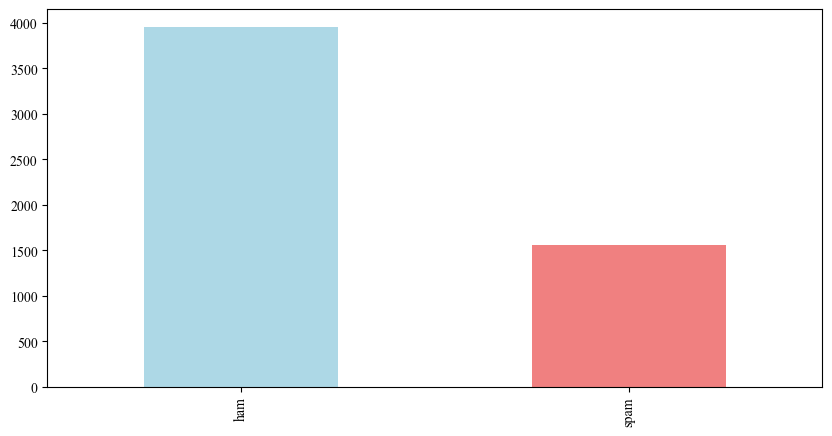

In [27]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
df.label.value_counts().plot(kind='bar', ax=ax, color=['lightblue', 'lightcoral'])
plt.show()

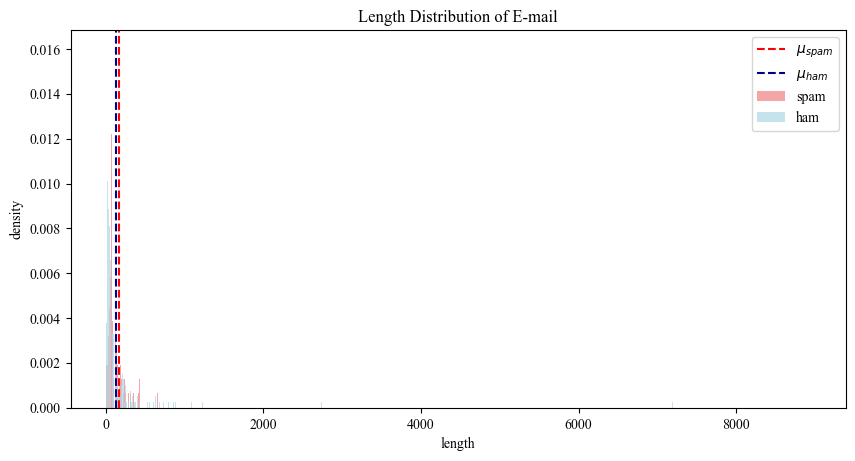

In [28]:

spam_len = list(df_spam.len.values)
ham_len = list(df_ham.len.values)

bins = np.arange(min(spam_len), max(spam_len), 1)
hist, edges = np.histogram(spam_len, bins=bins, density=True)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]

fig, ax = plt.subplots(1, figsize=(10,5), dpi=100)
ax.bar(x, hist, width=width*0.91, color='lightcoral', label='spam', alpha=0.7)
ax.set_ylabel("counts")
ax.set_xlabel("k")
ax.set_title("")

ax.axvline(np.mean(spam_len), c='red', label='$\mu_{spam}$', linestyle='dashed')
ax.axvline(np.mean(ham_len), c='darkblue', label='$\mu_{ham}$', linestyle='dashed')

bins = np.arange(min(ham_len), max(ham_len), 1)
hist, edges = np.histogram(ham_len, bins=bins, density=True)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]
ax.bar(x, hist, width=width*0.90, color='lightblue', label='ham', alpha=0.7)

ax.legend()
ax.set_ylabel("density")
ax.set_xlabel("length")
ax.set_title("Length Distribution of E-mail") #TODO: maybe change to number of words

plt.show()

In [29]:
print(f'Mean of spam: {np.mean(spam_len)}')
print(f'Standard deviation of spam: {np.std(spam_len)}')
print()
print(f'Mean of ham: {np.mean(ham_len)}')
print(f'Standard deviation of ham: {np.std(ham_len)}')

Mean of spam: 165.4096153846154
Standard deviation of spam: 345.2620532586298

Mean of ham: 132.83223684210526
Standard deviation of ham: 342.1942693248409


In [30]:
df['misspelled'] = df.progress_apply(lambda row: find_misspelled(row), axis=1)

100%|██████████| 5512/5512 [06:23<00:00, 14.39it/s]


In [31]:
df['misspelled_size'] = df['misspelled'].apply(lambda x: len(x))

In [32]:
df_spam = df[df.label=='spam']
df_ham = df[df.label=='ham']

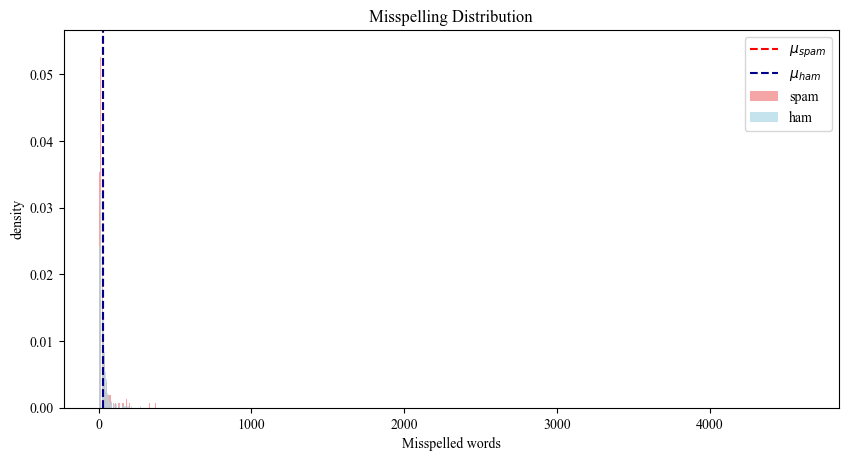

In [33]:
spam_len = list(df_spam.misspelled_size.values)
ham_len = list(df_ham.misspelled_size.values)

bins = np.arange(min(spam_len), max(spam_len), 1)
hist, edges = np.histogram(spam_len, bins=bins, density=True)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]

fig, ax = plt.subplots(1, figsize=(10,5), dpi=100)
ax.bar(x, hist, width=width*0.91, color='lightcoral', label='spam', alpha=0.7)
ax.set_ylabel("counts")
ax.set_xlabel("k")
ax.set_title("")

ax.axvline(np.mean(spam_len), c='red', label='$\mu_{spam}$', linestyle='dashed')
ax.axvline(np.mean(ham_len), c='darkblue', label='$\mu_{ham}$', linestyle='dashed')

bins = np.arange(min(ham_len), max(ham_len), 1)
hist, edges = np.histogram(ham_len, bins=bins, density=True)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]
ax.bar(x, hist, width=width*0.90, color='lightblue', label='ham', alpha=0.7)

ax.legend()
ax.set_ylabel("density")
ax.set_xlabel("Misspelled words")
ax.set_title("Misspelling Distribution")

plt.show()

In [34]:
print(f'Mean of spam: {np.mean(spam_len)}')
print(f'Standard deviation of spam: {np.std(spam_len)}')
print()
print(f'Mean of ham: {np.mean(ham_len)}')
print(f'Standard deviation of ham: {np.std(ham_len)}')

Mean of spam: 26.098717948717947
Standard deviation of spam: 41.68982533925853

Mean of ham: 27.90182186234818
Standard deviation of ham: 81.5357462200511


## Job Postings

In [35]:
df = pd.read_csv('../data/clean/clean_Job_postings.csv', encoding= "ISO-8859-1")
df.tokens = df.tokens.apply(literal_eval)
df.head()

,label,text,tokens,str_tokens
0,fraudulent,"We're Food52, and we've created a groundbreaki...","[creat, groundbreak, cook, site, support, conn...",creat groundbreak cook site support connect ce...
1,fraudulent,"90 Seconds, the worlds Cloud Video Production ...","[second, world, cloud, video, product, second,...",second world cloud video product second world ...
2,fraudulent,Valor Services provides Workforce Solutions th...,"[valor, servic, provid, workforc, solut, meet,...",valor servic provid workforc solut meet need c...
3,fraudulent,Our passion for improving quality of life thro...,"[passion, improv, qualiti, life, geographi, he...",passion improv qualiti life geographi heart ev...
4,fraudulent,SpotSource Solutions LLC is a Global Human Cap...,"[spotsourc, solut, llc, global, human, capit, ...",spotsourc solut llc global human capit manag c...


In [36]:
df['len'] = df.tokens.str.len()
df_spam = df[df.label=='fraudulent']
df_ham = df[df.label=='genuine']

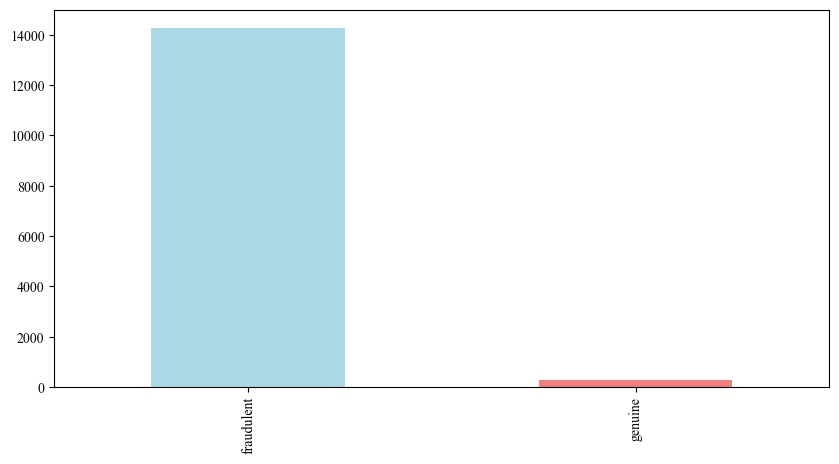

In [37]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
df.label.value_counts().plot(kind='bar', ax=ax, color=['lightblue', 'lightcoral'])
plt.show()

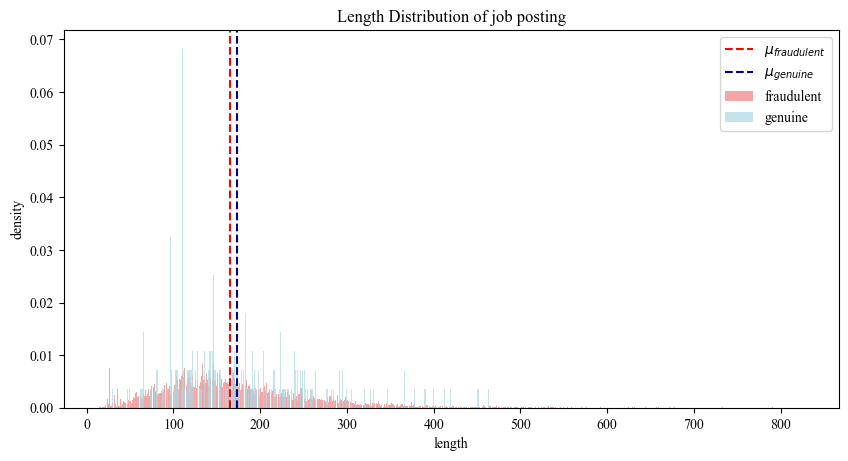

In [38]:

spam_len = list(df_spam.len.values)
ham_len = list(df_ham.len.values)

bins = np.arange(min(spam_len), max(spam_len), 1)
hist, edges = np.histogram(spam_len, bins=bins, density=True)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]

fig, ax = plt.subplots(1, figsize=(10,5), dpi=100)
ax.bar(x, hist, width=width*0.91, color='lightcoral', label='fraudulent', alpha=0.7)
ax.set_ylabel("counts")
ax.set_xlabel("k")
ax.set_title("")

ax.axvline(np.mean(spam_len), c='red', label='$\mu_{fraudulent}$', linestyle='dashed')
ax.axvline(np.mean(ham_len), c='darkblue', label='$\mu_{genuine}$', linestyle='dashed')

bins = np.arange(min(ham_len), max(ham_len), 1)
hist, edges = np.histogram(ham_len, bins=bins, density=True)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]
ax.bar(x, hist, width=width*0.90, color='lightblue', label='genuine', alpha=0.7)

ax.legend()
ax.set_ylabel("density")
ax.set_xlabel("length")
ax.set_title("Length Distribution of job posting") #TODO: maybe change to number of words

plt.show()

In [39]:
print(f'Mean of fraudulent: {np.mean(spam_len)}')
print(f'Standard deviation of fraudulent: {np.std(spam_len)}')
print()
print(f'Mean of genuine: {np.mean(ham_len)}')
print(f'Standard deviation of genuine: {np.std(ham_len)}')

Mean of fraudulent: 165.83299517246203
Standard deviation of fraudulent: 88.89742561795478

Mean of genuine: 173.69534050179212
Standard deviation of genuine: 89.46694197237123


In [40]:
df['misspelled'] = df.progress_apply(lambda row: find_misspelled(row), axis=1)

100%|██████████| 14572/14572 [20:27<00:00, 11.87it/s]


In [41]:
df['misspelled_size'] = df['misspelled'].apply(lambda x: len(x))

In [42]:
df_spam = df[df.label=='fraudulent']
df_ham = df[df.label=='genuine']

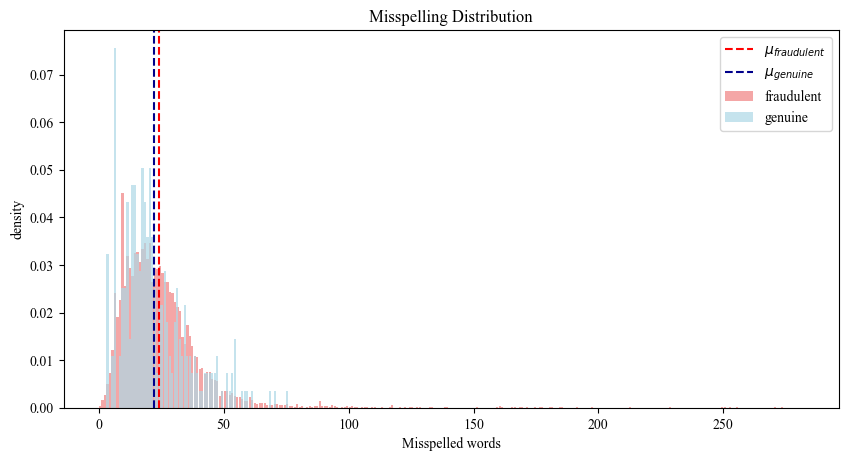

In [43]:
spam_len = list(df_spam.misspelled_size.values)
ham_len = list(df_ham.misspelled_size.values)

bins = np.arange(min(spam_len), max(spam_len), 1)
hist, edges = np.histogram(spam_len, bins=bins, density=True)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]

fig, ax = plt.subplots(1, figsize=(10,5), dpi=100)
ax.bar(x, hist, width=width*0.91, color='lightcoral', label='fraudulent', alpha=0.7)
ax.set_ylabel("counts")
ax.set_xlabel("k")
ax.set_title("")

ax.axvline(np.mean(spam_len), c='red', label='$\mu_{fraudulent}$', linestyle='dashed')
ax.axvline(np.mean(ham_len), c='darkblue', label='$\mu_{genuine}$', linestyle='dashed')

bins = np.arange(min(ham_len), max(ham_len), 1)
hist, edges = np.histogram(ham_len, bins=bins, density=True)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]
ax.bar(x, hist, width=width*0.90, color='lightblue', label='genuine', alpha=0.7)

ax.legend()
ax.set_ylabel("density")
ax.set_xlabel("Misspelled words")
ax.set_title("Misspelling Distribution")

plt.show()

In [44]:
print(f'Mean of spam: {np.mean(spam_len)}')
print(f'Standard deviation of spam: {np.std(spam_len)}')
print()
print(f'Mean of ham: {np.mean(ham_len)}')
print(f'Standard deviation of ham: {np.std(ham_len)}')

Mean of spam: 24.03414258728049
Standard deviation of spam: 17.03145553807919

Mean of ham: 22.301075268817204
Standard deviation of ham: 14.151599790185376


## News

In [45]:
df = pd.read_csv('../data/clean/clean_NEWS.csv', encoding= "ISO-8859-1")
df.tokens = df.tokens.apply(literal_eval)
df.head()

,text,label,tokens,str_tokens
0,WASHINGTON (Reuters) - The head of a conservat...,real,"[washington, reuter, head, conserv, republican...",washington reuter head conserv republican fact...
1,WASHINGTON (Reuters) - Transgender people will...,real,"[washington, reuter, transgend, peopl, allow, ...",washington reuter transgend peopl allow first ...
2,WASHINGTON (Reuters) - The special counsel inv...,real,"[washington, reuter, special, counsel, investi...",washington reuter special counsel investig lin...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,real,"[washington, reuter, trump, campaign, advis, g...",washington reuter trump campaign advis georg p...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,real,"[reuter, presid, donald, trump, call, postal, ...",reuter presid donald trump call postal servic ...


In [46]:
df['len'] = df.tokens.str.len()
df_spam = df[df.label=='fake']
df_ham = df[df.label=='real']

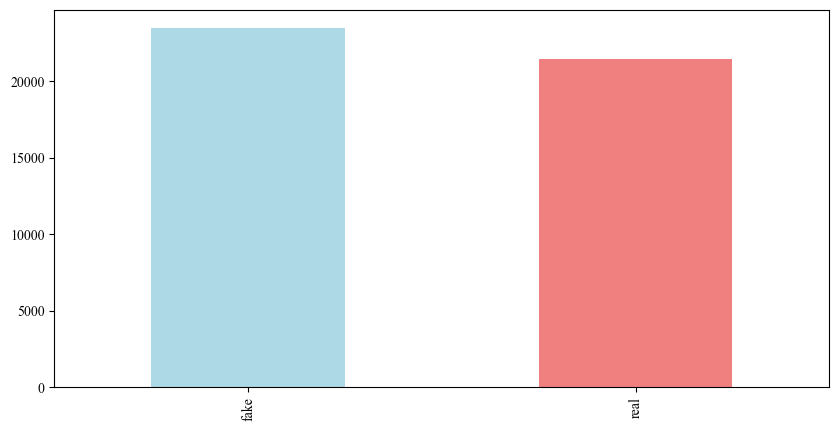

In [47]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
df.label.value_counts().plot(kind='bar', ax=ax, color=['lightblue', 'lightcoral'])
plt.show()

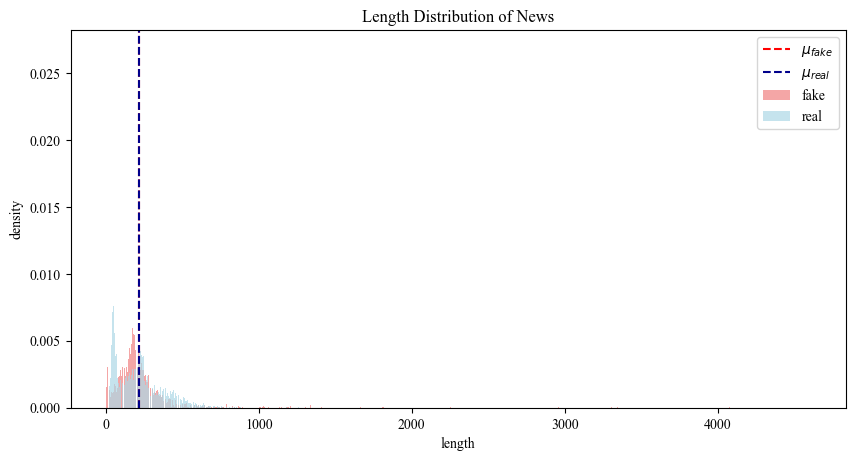

In [48]:

spam_len = list(df_spam.len.values)
ham_len = list(df_ham.len.values)

bins = np.arange(min(spam_len), max(spam_len), 1)
hist, edges = np.histogram(spam_len, bins=bins, density=True)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]

fig, ax = plt.subplots(1, figsize=(10,5), dpi=100)
ax.bar(x, hist, width=width*0.91, color='lightcoral', label='fake', alpha=0.7)
ax.set_ylabel("counts")
ax.set_xlabel("k")
ax.set_title("")

ax.axvline(np.mean(spam_len), c='red', label='$\mu_{fake}$', linestyle='dashed')
ax.axvline(np.mean(ham_len), c='darkblue', label='$\mu_{real}$', linestyle='dashed')

bins = np.arange(min(ham_len), max(ham_len), 1)
hist, edges = np.histogram(ham_len, bins=bins, density=True)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]
ax.bar(x, hist, width=width*0.90, color='lightblue', label='real', alpha=0.7)

ax.legend()
ax.set_ylabel("density")
ax.set_xlabel("length")
ax.set_title("Length Distribution of News") #TODO: maybe change to number of words

plt.show()

In [49]:
print(f'Mean of fake: {np.mean(spam_len)}')
print(f'Standard deviation of fake: {np.std(spam_len)}')
print()
print(f'Mean of real: {np.mean(ham_len)}')
print(f'Standard deviation of real: {np.std(ham_len)}')

Mean of fake: 220.3180869639283
Standard deviation of fake: 219.686330432129

Mean of real: 219.0895550263809
Standard deviation of real: 153.46726017470965


In [50]:
df['misspelled'] = df.progress_apply(lambda row: find_misspelled(row), axis=1)

100%|██████████| 44898/44898 [54:29<00:00, 13.73it/s]  


In [51]:
df['misspelled_size'] = df['misspelled'].apply(lambda x: len(x))

In [52]:
df_spam = df[df.label=='fake']
df_ham = df[df.label=='real']

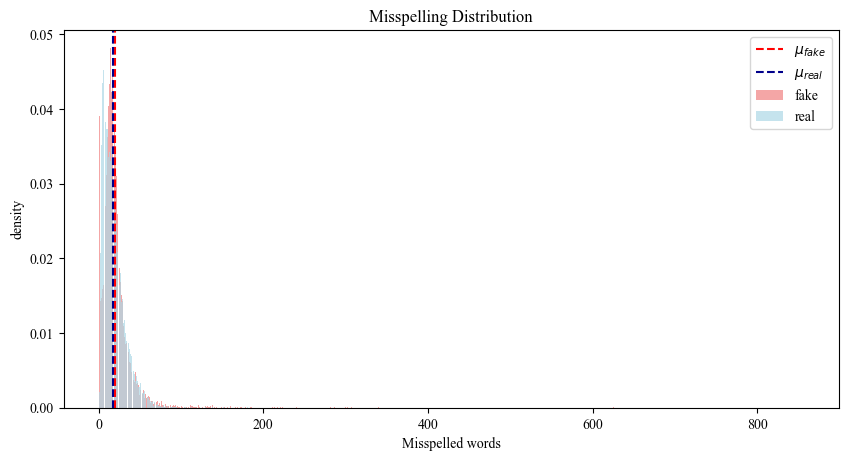

In [53]:
spam_len = list(df_spam.misspelled_size.values)
ham_len = list(df_ham.misspelled_size.values)

bins = np.arange(min(spam_len), max(spam_len), 1)
hist, edges = np.histogram(spam_len, bins=bins, density=True)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]

fig, ax = plt.subplots(1, figsize=(10,5), dpi=100)
ax.bar(x, hist, width=width*0.91, color='lightcoral', label='fake', alpha=0.7)
ax.set_ylabel("counts")
ax.set_xlabel("k")
ax.set_title("")

ax.axvline(np.mean(spam_len), c='red', label='$\mu_{fake}$', linestyle='dashed')
ax.axvline(np.mean(ham_len), c='darkblue', label='$\mu_{real}$', linestyle='dashed')

bins = np.arange(min(ham_len), max(ham_len), 1)
hist, edges = np.histogram(ham_len, bins=bins, density=True)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]
ax.bar(x, hist, width=width*0.90, color='lightblue', label='real', alpha=0.7)

ax.legend()
ax.set_ylabel("density")
ax.set_xlabel("Misspelled words")
ax.set_title("Misspelling Distribution")

plt.show()

In [54]:
print(f'Mean of spam: {np.mean(spam_len)}')
print(f'Standard deviation of spam: {np.std(spam_len)}')
print()
print(f'Mean of ham: {np.mean(ham_len)}')
print(f'Standard deviation of ham: {np.std(ham_len)}')

Mean of spam: 19.52680890933095
Standard deviation of spam: 19.1290331328607

Mean of ham: 17.811598263062052
Standard deviation of ham: 13.51344497447919
